# Importanto base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv("tips.csv")

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv("tips.csv")

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo os dados

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill': "valor_da_conta", 
    'tip': "gorjeta",
    'dessert': "sobremesa", 
    'day': "dia_da_semana", 
    'time': "hora_do_dia", 
    'size': "total_de_pessoas"
}

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No': "Não", 
    'Yes': "Sim"
}

In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3


In [15]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias = {
    'Sun': "Domingo", 
    'Sat': "Sábado", 
    'Thur': "Quinta", 
    'Fri': "Sexta"
}

In [17]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [18]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [19]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner': "Jantar", 
    'Lunch': "Almoço"
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [26]:
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
5,25.29,4.71,Não,Domingo,Jantar,4
6,8.77,2.00,Não,Domingo,Jantar,2
7,26.88,3.12,Não,Domingo,Jantar,4
8,15.04,1.96,Não,Domingo,Jantar,2
9,14.78,3.23,Não,Domingo,Jantar,2


# Importando o Seaborn

In [30]:
import seaborn as sns

In [31]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\user\anaconda3\envs\data_science\lib\site-packages
Requires: pandas, scipy, matplotlib, numpy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [36]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

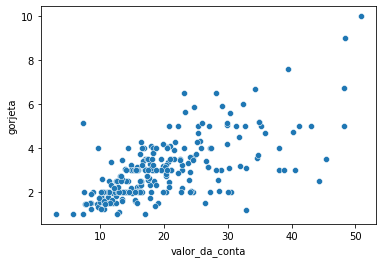

In [39]:
sns.scatterplot(x="valor_da_conta", y="gorjeta", data=gorjetas);

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [42]:
print("A base de dados contém {} registros".format( gorjetas.shape[0]))
print("Registros não nulos")
gorjetas.count()

A base de dados contém 244 registros
Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [44]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [45]:
gorjetas["porcentagem"] = gorjetas["gorjeta"] / gorjetas["valor_da_conta"]

In [46]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [48]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [49]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


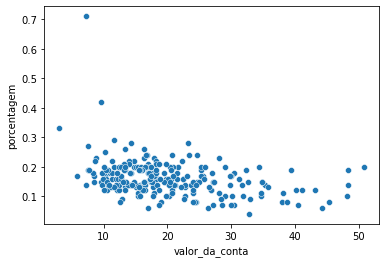

In [50]:
porcentagem_conta = sns.scatterplot(x="valor_da_conta", y="porcentagem", 
                                    data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

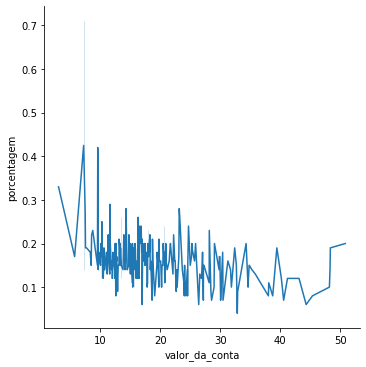

In [52]:
porcentagem_conta_linha = sns.relplot(x="valor_da_conta", y="porcentagem",
                                      kind="line", data=gorjetas)

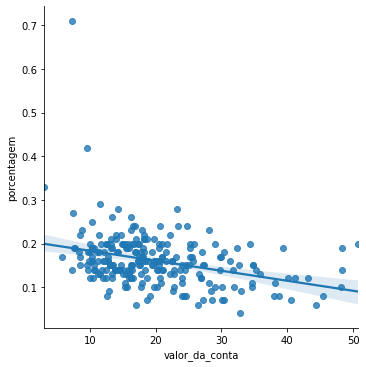

In [54]:
sns.lmplot(x="valor_da_conta", y="porcentagem", data=gorjetas);